In [19]:
# These are all the modules we'll be using later. Make sure you can import them
# before proceeding further.
from __future__ import print_function
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
import tarfile
from IPython.display import display, Image
from scipy import ndimage
from sklearn.linear_model import LogisticRegression
from six.moves.urllib.request import urlretrieve
from six.moves import cPickle as pickle

import imageio

# Config the matplotlib backend as plotting inline in IPython
%matplotlib inline


In [5]:
a = np.array([1,2,3])
a

array([1, 2, 3])

In [12]:
np.exp(a) / np.sum(np.exp(a))

array([ 0.09003057,  0.24472847,  0.66524096])

In [22]:
scores = a

In [14]:
scores = np.array([[1, 2, 3, 6],
                   [2, 4, 5, 6],
                   [3, 8, 7, 6]])
scores

array([[1, 2, 3, 6],
       [2, 4, 5, 6],
       [3, 8, 7, 6]])

In [18]:
np.sum(scores, axis=0)

array([ 6, 14, 15, 18])

In [19]:
np.exp(scores)

array([[  2.71828183e+00,   7.38905610e+00,   2.00855369e+01,
          4.03428793e+02],
       [  7.38905610e+00,   5.45981500e+01,   1.48413159e+02,
          4.03428793e+02],
       [  2.00855369e+01,   2.98095799e+03,   1.09663316e+03,
          4.03428793e+02]])

In [17]:
np.sum(np.exp(scores), axis=0)

array([   30.19287485,  3042.94519317,  1265.13185445,  1210.28638048])

In [20]:
np.exp(scores) / np.sum(np.exp(scores), axis=0)

array([[ 0.09003057,  0.00242826,  0.01587624,  0.33333333],
       [ 0.24472847,  0.01794253,  0.11731043,  0.33333333],
       [ 0.66524096,  0.97962921,  0.86681333,  0.33333333]])

In [23]:
exp_scores = np.exp(scores)
exp_scores / np.sum(exp_scores, axis=0)

array([ 0.09003057,  0.24472847,  0.66524096])

In [19]:
"""Softmax."""

scores = np.array([3.0, 1.0, 0.2])

import numpy as np

def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    # pass  # TODO: Compute and return softmax(x)
    exp_scores = np.exp(x)
    return exp_scores / np.sum(exp_scores, axis=0)

print(softmax(scores))



[ 0.8360188   0.11314284  0.05083836]


In [5]:
# Plot softmax curves
import matplotlib.pyplot as plt
x = np.arange(-2.0, 6.0, 0.1)
x

array([ -2.00000000e+00,  -1.90000000e+00,  -1.80000000e+00,
        -1.70000000e+00,  -1.60000000e+00,  -1.50000000e+00,
        -1.40000000e+00,  -1.30000000e+00,  -1.20000000e+00,
        -1.10000000e+00,  -1.00000000e+00,  -9.00000000e-01,
        -8.00000000e-01,  -7.00000000e-01,  -6.00000000e-01,
        -5.00000000e-01,  -4.00000000e-01,  -3.00000000e-01,
        -2.00000000e-01,  -1.00000000e-01,   1.77635684e-15,
         1.00000000e-01,   2.00000000e-01,   3.00000000e-01,
         4.00000000e-01,   5.00000000e-01,   6.00000000e-01,
         7.00000000e-01,   8.00000000e-01,   9.00000000e-01,
         1.00000000e+00,   1.10000000e+00,   1.20000000e+00,
         1.30000000e+00,   1.40000000e+00,   1.50000000e+00,
         1.60000000e+00,   1.70000000e+00,   1.80000000e+00,
         1.90000000e+00,   2.00000000e+00,   2.10000000e+00,
         2.20000000e+00,   2.30000000e+00,   2.40000000e+00,
         2.50000000e+00,   2.60000000e+00,   2.70000000e+00,
         2.80000000e+00,

In [7]:
np.ones_like(x)

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.])

In [8]:
scores = np.vstack([x, np.ones_like(x), 0.2 * np.ones_like(x)])
scores

array([[ -2.00000000e+00,  -1.90000000e+00,  -1.80000000e+00,
         -1.70000000e+00,  -1.60000000e+00,  -1.50000000e+00,
         -1.40000000e+00,  -1.30000000e+00,  -1.20000000e+00,
         -1.10000000e+00,  -1.00000000e+00,  -9.00000000e-01,
         -8.00000000e-01,  -7.00000000e-01,  -6.00000000e-01,
         -5.00000000e-01,  -4.00000000e-01,  -3.00000000e-01,
         -2.00000000e-01,  -1.00000000e-01,   1.77635684e-15,
          1.00000000e-01,   2.00000000e-01,   3.00000000e-01,
          4.00000000e-01,   5.00000000e-01,   6.00000000e-01,
          7.00000000e-01,   8.00000000e-01,   9.00000000e-01,
          1.00000000e+00,   1.10000000e+00,   1.20000000e+00,
          1.30000000e+00,   1.40000000e+00,   1.50000000e+00,
          1.60000000e+00,   1.70000000e+00,   1.80000000e+00,
          1.90000000e+00,   2.00000000e+00,   2.10000000e+00,
          2.20000000e+00,   2.30000000e+00,   2.40000000e+00,
          2.50000000e+00,   2.60000000e+00,   2.70000000e+00,
        

In [9]:
softmax(scores)

array([[ 0.03321095,  0.03657602,  0.04026786,  0.04431519,  0.04874866,
         0.05360079,  0.05890597,  0.06470033,  0.07102165,  0.07790913,
         0.08540313,  0.09354484,  0.10237584,  0.11193758,  0.12227071,
         0.13341442,  0.1454055 ,  0.15827749,  0.17205954,  0.18677538,
         0.20244208,  0.21906889,  0.23665609,  0.25519382,  0.27466117,
         0.29502533,  0.31624106,  0.33825043,  0.36098289,  0.38435576,
         0.40827509,  0.4326369 ,  0.45732888,  0.48223232,  0.50722433,
         0.53218029,  0.55697628,  0.58149154,  0.60561081,  0.62922636,
         0.65223985,  0.67456369,  0.69612215,  0.71685193,  0.73670245,
         0.75563572,  0.77362587,  0.79065851,  0.80672976,  0.82184522,
         0.8360188 ,  0.84927158,  0.86163055,  0.87312754,  0.88379809,
         0.89368047,  0.90281483,  0.91124236,  0.91900464,  0.9261431 ,
         0.93269849,  0.93871054,  0.94421766,  0.94925668,  0.95386276,
         0.9580692 ,  0.96190744,  0.96540703,  0.9

In [10]:
softmax(scores).T

array([[ 0.03321095,  0.66705977,  0.29972928],
       [ 0.03657602,  0.66473796,  0.29868602],
       [ 0.04026786,  0.66219069,  0.29754146],
       [ 0.04431519,  0.65939813,  0.29628668],
       [ 0.04874866,  0.65633915,  0.29491219],
       [ 0.05360079,  0.6529913 ,  0.29340791],
       [ 0.05890597,  0.64933087,  0.29176317],
       [ 0.06470033,  0.6453329 ,  0.28996677],
       [ 0.07102165,  0.64097135,  0.28800699],
       [ 0.07790913,  0.63621917,  0.2858717 ],
       [ 0.08540313,  0.6310485 ,  0.28354837],
       [ 0.09354484,  0.62543093,  0.28102423],
       [ 0.10237584,  0.61933776,  0.27828639],
       [ 0.11193758,  0.61274041,  0.27532201],
       [ 0.12227071,  0.60561081,  0.27211848],
       [ 0.13341442,  0.59792194,  0.26866364],
       [ 0.1454055 ,  0.58964839,  0.2649461 ],
       [ 0.15827749,  0.58076705,  0.26095546],
       [ 0.17205954,  0.57125779,  0.25668267],
       [ 0.18677538,  0.56110424,  0.25212039],
       [ 0.20244208,  0.55029462,  0.247

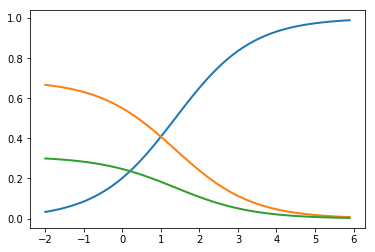

In [11]:
plt.plot(x, softmax(scores).T, linewidth=2)
plt.show()

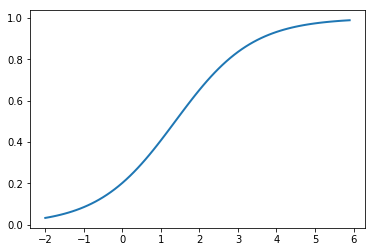

In [12]:
plt.plot(x, softmax(scores).T[:, 0], linewidth=2)
plt.show()

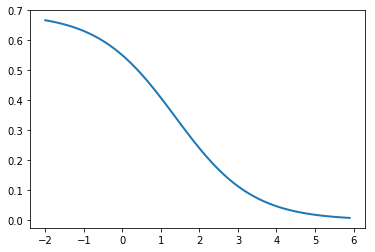

In [13]:
plt.plot(x, softmax(scores).T[:, 1], linewidth=2)
plt.show()

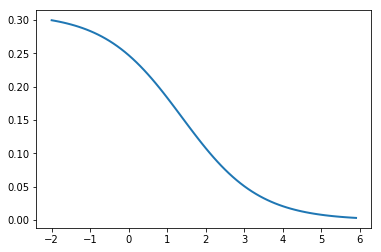

In [14]:
plt.plot(x, softmax(scores).T[:, 2], linewidth=2)
plt.show()

In [53]:
# a = 1000000000
# a = 1
a = 0
a

0

In [54]:
for i in range(1000000):
    a += 0.000001
a

1.000000000007918

In [55]:
a - 1000000000

-999999999.0

In [47]:
a - 1

0.9999999999177334

In [3]:
# random
np.ndarray(shape=(3,2,2), dtype=float)

array([[[  3.10503618e+231,   3.10503618e+231],
        [  2.17917726e-314,   2.17919878e-314]],

       [[  2.17917059e-314,   2.17919892e-314],
        [  3.10503618e+231,   0.00000000e+000]],

       [[  2.15754679e-314,   3.10503618e+231],
        [  3.10503618e+231,   8.38742929e-309]]])

In [7]:
np.zeros(shape=(3,2,2), dtype=float)[0]

array([[ 0.,  0.],
       [ 0.,  0.]])

In [27]:
display(Image(filename='./notMNIST_large/A/emlwZXJoZWFkLnR0Zg==.png'))

In [63]:
# [0, 255]
image = ndimage.imread('./notMNIST_large/A/emlwZXJoZWFkLnR0Zg==.png').astype(float)
image

/Users/rui/0_my_staff/python_projs/env/lib/python2.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  


array([[   0.,    0.,    0.,    0.,    0.,    0.,    1.,    4.,    3.,
           0.,    8.,  111.,  217.,  255.,  182.,    5.,    0.,    1.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.],
       [   0.,    0.,    0.,    0.,    0.,    0.,    1.,    1.,    0.,
          66.,  206.,  255.,  254.,  252.,  255.,  112.,    0.,    4.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.],
       [   0.,    0.,    0.,    0.,    1.,    0.,   17.,   79.,  182.,
         255.,  255.,  253.,  254.,  254.,  255.,  236.,   34.,    0.,
           2.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.],
       [   0.,    0.,    0.,    0.,    2.,    0.,  168.,  255.,  252.,
         253.,  253.,  255.,  255.,  255.,  252.,  255.,  159.,    0.,
           3.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.],
       [   0.,    0.,    0.,    1.,    0.,   13.,  230.,  255.,  250.,
         255.

In [73]:
imageio.imread('./notMNIST_large/A/emlwZXJoZWFkLnR0Zg==.png').astype(float)

Image([[   0.,    0.,    0.,    0.,    0.,    0.,    1.,    4.,    3.,
           0.,    8.,  111.,  217.,  255.,  182.,    5.,    0.,    1.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.],
       [   0.,    0.,    0.,    0.,    0.,    0.,    1.,    1.,    0.,
          66.,  206.,  255.,  254.,  252.,  255.,  112.,    0.,    4.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.],
       [   0.,    0.,    0.,    0.,    1.,    0.,   17.,   79.,  182.,
         255.,  255.,  253.,  254.,  254.,  255.,  236.,   34.,    0.,
           2.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.],
       [   0.,    0.,    0.,    0.,    2.,    0.,  168.,  255.,  252.,
         253.,  253.,  255.,  255.,  255.,  252.,  255.,  159.,    0.,
           3.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.],
       [   0.,    0.,    0.,    1.,    0.,   13.,  230.,  255.,  250.,
         255.

In [68]:
# [0, 255]
image = imageio.imread('./notMNIST_large/A/emlwZXJoZWFkLnR0Zg==.png').astype(float)
image

Image([[   0.,    0.,    0.,    0.,    0.,    0.,    1.,    4.,    3.,
           0.,    8.,  111.,  217.,  255.,  182.,    5.,    0.,    1.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.],
       [   0.,    0.,    0.,    0.,    0.,    0.,    1.,    1.,    0.,
          66.,  206.,  255.,  254.,  252.,  255.,  112.,    0.,    4.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.],
       [   0.,    0.,    0.,    0.,    1.,    0.,   17.,   79.,  182.,
         255.,  255.,  253.,  254.,  254.,  255.,  236.,   34.,    0.,
           2.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.],
       [   0.,    0.,    0.,    0.,    2.,    0.,  168.,  255.,  252.,
         253.,  253.,  255.,  255.,  255.,  252.,  255.,  159.,    0.,
           3.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.],
       [   0.,    0.,    0.,    1.,    0.,   13.,  230.,  255.,  250.,
         255.

In [69]:
image.shape

(28, 28)

In [70]:
np.mean(image)

131.79591836734693

In [71]:
np.std(image)

119.50883403293543

In [57]:
# image is scaled to [0, 1]
image = plt.imread('./notMNIST_large/A/emlwZXJoZWFkLnR0Zg==.png')
# image = plt.imread('./notMNIST_large/A/emlwZXJoZWFkLnR0Zg==.png').astype(float)
image

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.00392157,  0.01568628,  0.01176471,  0.        ,
         0.03137255,  0.43529412,  0.8509804 ,  1.        ,  0.71372551,
         0.01960784,  0.        ,  0.00392157,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.00392157,  0.00392157,  0.        ,  0.25882354,
         0.80784315,  1.        ,  0.99607843,  0.98823529,  1.        ,
         0.43921569,  0.        ,  0.01568628,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.00392157,
         0.        ,  0.06666667,  0.30980393,  0.71372551,  1.        ,
         1.        ,  0.9921

In [58]:
image.shape

(28, 28)

In [59]:
np.mean(image)

0.51684672

In [60]:
np.std(image)

0.46866208

In [61]:
np.max(image)

1.0

In [62]:
np.min(image)

0.0

In [25]:
np.max(image)

1.0